Python Analysis and Feature Engineering
=======


This lab will introduce to practical code for two concepts

1. SQL style querying in Pandas 
1. SQL style data shaping in Pandas





**Notebook Setup**

In [ ]:
#to allow plots to render
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

In [4]:
flooby = "dir"
!$flooby

 Volume in drive C has no label.
 Volume Serial Number is 0CF2-974E

 Directory of c:\2021_10_DSI_WE\drew.minkin@divergence.one\py\Day 4\08 Pandas and SQL

01/30/2022  09:51 AM    <DIR>          .
01/30/2022  09:52 AM    <DIR>          ..
01/30/2022  02:08 PM    <DIR>          .ipynb_checkpoints
01/30/2022  08:08 AM               290 .library.json
01/30/2022  08:08 AM           344,971 labtrain1.csv
01/30/2022  08:08 AM           849,391 labtrain2.csv
01/30/2022  08:08 AM            17,122 Parquet to CSV Notebook.ipynb
01/30/2022  08:08 AM               291 README.md
01/30/2022  08:08 AM           281,266 SQL to Pandas Review.ipynb
               6 File(s)      1,493,331 bytes
               3 Dir(s)  113,347,928,064 bytes free


In [ ]:
!dir

In [5]:
df = pd.read_csv('labtrain1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         5332 non-null   int64  
 1   Calendar_Year  5332 non-null   int64  
 2   Model_Year     5332 non-null   int64  
 3   NVVar1         5332 non-null   float64
 4   NVVar2         5332 non-null   float64
 5   NVVar3         5332 non-null   float64
 6   NVVar4         5332 non-null   float64
 7   HasLoss        5332 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 333.4 KB


In [6]:
df.describe()

,Row_ID,Calendar_Year,Model_Year,NVVar1,NVVar2,NVVar3,NVVar4,HasLoss
count,5.332000e+03,5332.000000,5332.000000,5332.000000,5332.000000,5332.000000,5332.000000,5332.000000
mean,6.487360e+06,2006.052701,1999.383346,0.044210,0.078245,0.079615,0.055697,0.502251
std,3.825032e+06,0.815829,4.932872,1.098786,1.131062,1.128958,1.103533,0.500042
min,1.573000e+03,2005.000000,1981.000000,-0.231530,-0.266117,-0.272337,-0.251419,0.000000
25%,3.229406e+06,2005.000000,1996.000000,-0.231530,-0.266117,-0.272337,-0.251419,0.000000
50%,6.380048e+06,2006.000000,2000.000000,-0.231530,-0.266117,-0.272337,-0.251419,1.000000
75%,9.802822e+06,2007.000000,2003.000000,-0.231530,-0.266117,-0.272337,-0.251419,1.000000
max,1.318136e+07,2007.000000,2008.000000,6.627110,8.883081,8.691144,6.388802,1.000000


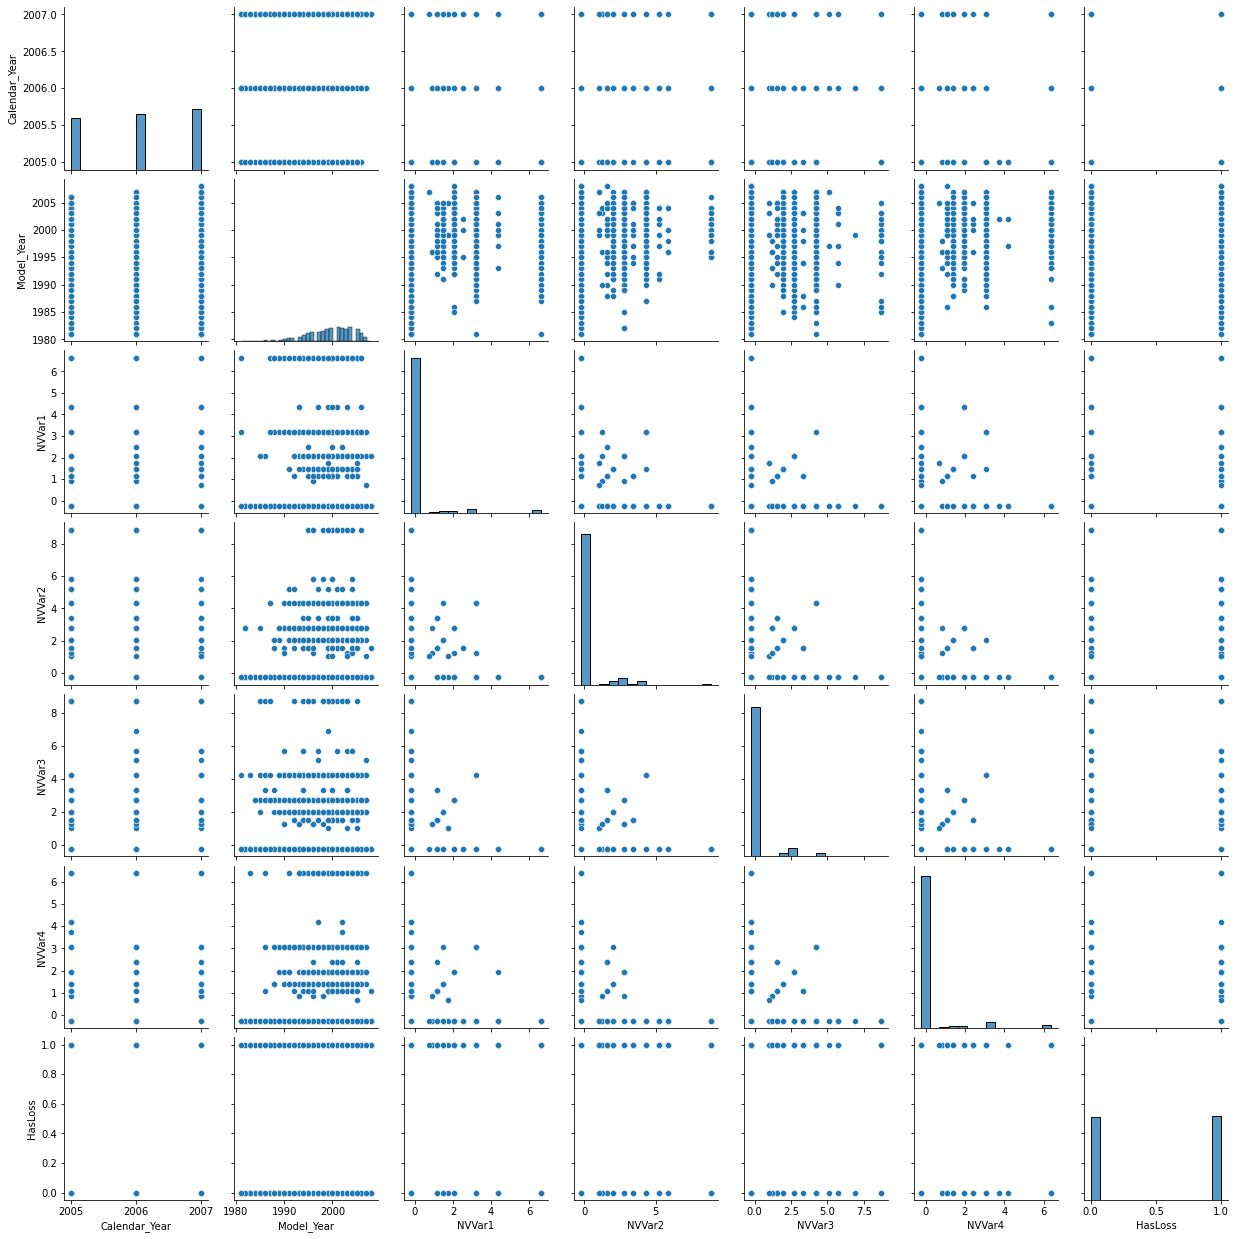

In [7]:
sns.pairplot(df[
    ["Calendar_Year","Model_Year","NVVar1","NVVar2","NVVar3","NVVar4","HasLoss"]
])

**Data Setup**

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         5332 non-null   int64  
 1   Calendar_Year  5332 non-null   int64  
 2   Model_Year     5332 non-null   int64  
 3   NVVar1         5332 non-null   float64
 4   NVVar2         5332 non-null   float64
 5   NVVar3         5332 non-null   float64
 6   NVVar4         5332 non-null   float64
 7   HasLoss        5332 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 333.4 KB


SQL style querying in Pandas
----
1. SELECT or Vertical filters
1. WHERE or Horizontal filters
1. ORDER BY or Sort
1. TOP NN/ LIMIT NN
1. GROUP BY and aggregate samples
1. HAVING or filtered aggregation

**SELECT**

In [9]:
#SELECT Calendar_Year,NVVar1 from df
#by label
select_df1 = df[["Calendar_Year","NVVar1"]]
select_df1

,Calendar_Year,NVVar1
0,2006,-0.23153
1,2005,-0.23153
2,2006,-0.23153
3,2005,-0.23153
4,2007,-0.23153
...,...,...
5327,2007,-0.23153
5328,2007,-0.23153
5329,2007,-0.23153
5330,2005,-0.23153


In [10]:
collist = ",".join(list(select_df1.columns)).replace(",","\',\'")
collist

"Calendar_Year','NVVar1"

In [12]:
#SELECT Calendar_Year,NVVar1 from df
# by position
select_df2 = df[df.Calendar_Year == 2006].iloc[0:4,[1,3]]
select_df2

,Calendar_Year,NVVar1
0,2006,-0.23153
2,2006,-0.23153
8,2006,-0.23153
9,2006,-0.23153


In [15]:
select_df2 = df[df.Calendar_Year == 2006].loc[0:4,['Calendar_Year','NVVar1']]
select_df2

,Calendar_Year,NVVar1
0,2006,-0.23153
2,2006,-0.23153


In [16]:
#SELECT COUNT(*) FROM select_df2
len(select_df2)

2

In [17]:
for dt in select_df2.dtypes: print(dt)

int64
float64


In [18]:
#select only numerics
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df.select_dtypes(include=numerics) 
df_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Row_ID,5332.0,6.487360e+06,3.825032e+06,1573.000000,3.229406e+06,6.380048e+06,9.802822e+06,1.318136e+07
Calendar_Year,5332.0,2.006053e+03,8.158290e-01,2005.000000,2.005000e+03,2.006000e+03,2.007000e+03,2.007000e+03
Model_Year,5332.0,1.999383e+03,4.932872e+00,1981.000000,1.996000e+03,2.000000e+03,2.003000e+03,2.008000e+03
NVVar1,5332.0,4.421043e-02,1.098786e+00,-0.231530,-2.315299e-01,-2.315299e-01,-2.315299e-01,6.627110e+00
NVVar2,5332.0,7.824464e-02,1.131062e+00,-0.266117,-2.661168e-01,-2.661168e-01,-2.661168e-01,8.883081e+00
NVVar3,5332.0,7.961545e-02,1.128958e+00,-0.272337,-2.723372e-01,-2.723372e-01,-2.723372e-01,8.691144e+00
NVVar4,5332.0,5.569698e-02,1.103533e+00,-0.251419,-2.514189e-01,-2.514189e-01,-2.514189e-01,6.388802e+00
HasLoss,5332.0,5.022506e-01,5.000418e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


**ORDER BY**

In [19]:
#SELECT 
#     Calendar_Year,NVVar1 
#FROM
#     df 
#ORDER BY Calendar_Year ASC
select_df1.sort_values('Calendar_Year')

,Calendar_Year,NVVar1
3958,2005,-0.23153
1525,2005,-0.23153
3670,2005,-0.23153
1523,2005,-0.23153
3671,2005,-0.23153
...,...,...
1552,2007,1.48313
3640,2007,6.62711
1551,2007,-0.23153
3635,2007,-0.23153


In [20]:
#SELECT 
#     Calendar_Year,NVVar1 

#FROM
#     df 
#ORDER BY Calendar_Year DESC
select_df1.sort_values('Calendar_Year',False)

C:\Users\andre\AppData\Local\Temp/ipykernel_7696/2439323126.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only.
  select_df1.sort_values('Calendar_Year',False)


,Calendar_Year,NVVar1
3958,2005,-0.23153
1525,2005,-0.23153
3670,2005,-0.23153
1523,2005,-0.23153
3671,2005,-0.23153
...,...,...
1552,2007,1.48313
3640,2007,6.62711
1551,2007,-0.23153
3635,2007,-0.23153


**TOP / LIMIT**

In [21]:
#SELECT 
#Calendar_Year,NVVar1 
#FROM
#     df 
#ORDER BY Calendar_Year DESC
#LIMIT 50
select_df1.sort_values('Calendar_Year',ascending=False)[0:49]

,Calendar_Year,NVVar1
5331,2007,-0.231530
3747,2007,-0.231530
1677,2007,-0.231530
1678,2007,-0.231530
1679,2007,-0.231530
1680,2007,-0.231530
3753,2007,-0.231530
3751,2007,2.054683
3745,2007,-0.231530
3758,2007,2.054683


In [22]:
#SELECT 
#TOP 50 PERCENT
#Calendar_Year,NVVar1 
#FROM
#     df 
#ORDER BY Calendar_Year DESC
print("before:",len(select_df1))
#select_df1_after = select_df1.sort_values('Calendar_Year',ascending=False).head(int(df.shape[0]*.5))
select_df1_after = select_df1.sort_values('Calendar_Year',ascending=False).head(int(len(select_df1)*.5))
print("after:",len(select_df1_after))

before: 5332
after: 2666


In [ ]:
# WITH
#     foo as
#     (
#         SELECT 
#              *
#         from 
#             df
#         ORDER By Calendar_Year
#         LIMIT 50
#     )
#     SELECT 
#         Top 50% *
#     FROM
#         foo
print("before:",len(select_df1))
#select_df3 =select_df1[0:49].sort_values('Calendar_Year',ascending=False)
select_df2_after = \
    select_df1[0:49].sort_values(
        'Calendar_Year',ascending=False).head( \
            int(select_df1[0:49].sort_values(
                'Calendar_Year',ascending=False).shape[0]*.5))
print("after:",len(select_df2_after))

**GROUP BY**

In [23]:
# SELECT
#     Calendar_Year
#     ,COUNT(NVVar1) AS 'Calendar_Year_Count'
#     ,COUNT(DISTINCT NVVar1) AS 'Calendar_Year_Count_Distinct'
#     ,AVG(NVVar1) AS 'Calendar_Year_Count'
#     ,STDEVP(NVVar1) AS 'Calendar_Year_Count'
#     ,MIN(NVVar1) AS 'Calendar_Year_Count'
#     ,MAX(NVVar1) AS 'Calendar_Year_Count'
# FROM
#     df
# GROUP BY Calendar_Year
df_agg1 = pd.DataFrame(
    {
        'Calendar_Year_Count':
            df.groupby('Calendar_Year')
                .count()['NVVar1']
        , 
        'Calendar_Year_NVVar1_Count_Distinct':
            df.groupby('Calendar_Year')
                ['NVVar1'].nunique()
        ,
        'Calendar_Year_NVVar1_Avg':
            df.groupby('Calendar_Year')
                .mean()['NVVar1']
        , 
        'Calendar_Year_NVVar1_Std':
            df.groupby('Calendar_Year')
                .std()['NVVar1']
        , 
        'Calendar_Year_NVVar1_Min':
            df.groupby('Calendar_Year')
                .min()['NVVar1']        
        , 
        'Calendar_Year_NVVar1_Max':
            df.groupby('Calendar_Year')
                .max()['NVVar1']                
    }
)
df_agg1

,Calendar_Year_Count,Calendar_Year_NVVar1_Count_Distinct,Calendar_Year_NVVar1_Avg,Calendar_Year_NVVar1_Std,Calendar_Year_NVVar1_Min,Calendar_Year_NVVar1_Max
Calendar_Year,,,,,,
2005,1641,8,0.050172,1.078154,-0.23153,6.62711
2006,1769,10,0.027019,1.083560,-0.23153,6.62711
2007,1922,10,0.054943,1.130088,-0.23153,6.62711


In [24]:
#HasLoss by ModelYear
df_agg2 = pd.DataFrame(
    {
        '2005-2006 Loss Count':
            df.loc[(df.Calendar_Year <= 2006)  ].groupby('Model_Year')
                .sum()['HasLoss']
,
        '2007-2008 Loss Count':
            df.loc[(df.Calendar_Year > 2006)  ].groupby('Model_Year')
                .sum()['HasLoss']
    }
)

In [25]:
df_agg2

,2005-2006 Loss Count,2007-2008 Loss Count
Model_Year,,
1981,2.0,0
1982,1.0,1
1983,2.0,4
1984,2.0,0
1985,4.0,3
1986,6.0,3
1987,6.0,5
1988,17.0,5
1989,21.0,5


In [26]:
dfg =df.groupby('Calendar_Year')
type(dfg)

pandas.core.groupby.generic.DataFrameGroupBy

In [27]:
dfg.sum()['HasLoss']

Calendar_Year
2005    836
2006    875
2007    967
Name: HasLoss, dtype: int64

In [ ]:
df_agg2

In [28]:
 df.groupby('Calendar_Year').count()

,Row_ID,Model_Year,NVVar1,NVVar2,NVVar3,NVVar4,HasLoss
Calendar_Year,,,,,,,
2005,1641,1641,1641,1641,1641,1641,1641
2006,1769,1769,1769,1769,1769,1769,1769
2007,1922,1922,1922,1922,1922,1922,1922


SQL style data shaping in Pandas
----
1. AS or derived column review
1. JOIN or key based
1. UNION or schema based
1. Pandas operations that don't ft in SQL Box

**AS or derived column review**

In [29]:
# WITH 
#     NVVar1_Std as
#         (
#             SELECT
#                 STDEVP(NVVar1) AS NVVar1_Std
#             FROM 
#                 df
#         )
#     NVVar1_Avg as
#         (
#             SELECT
#                 AVG(NVVar1) AS NVVar1_Avg
#             FROM 
#                 df
#         )
# SELECT
#     Calendar_Year
#     ,NVVar1
#     ,
#         (
#             NVVar1
#             -
#             NVVar1_Avg.NVVar1_Avg
#         )
#         /
#         NVVar1_Std.NVVar1_Std
#     AS NVVar1_Z_Score
# FROM
#     df
# FULL OUTER JOIN 
#     NVVar1_Std
# ON
#     1=1
# FULL OUTER JOIN 
#     NVVar1_Avg
# ON
#     1=1
df['NVVar1_ZScore'] \
    = (
            df['NVVar1']  \
            -  \
            df['NVVar1'].mean() \
        )  \
            /  \
        df['NVVar1'].std(ddof=0)
#alternately df['NVVar1_ZScore']= stats.zscore(df['NVVar1'], axis=1, ddof=1).to_frame()
df[["Calendar_Year","NVVar1","NVVar1_ZScore"]]

,Calendar_Year,NVVar1,NVVar1_ZScore
0,2006,-0.23153,-0.250973
1,2005,-0.23153,-0.250973
2,2006,-0.23153,-0.250973
3,2005,-0.23153,-0.250973
4,2007,-0.23153,-0.250973
...,...,...,...
5327,2007,-0.23153,-0.250973
5328,2007,-0.23153,-0.250973
5329,2007,-0.23153,-0.250973
5330,2005,-0.23153,-0.250973


In [30]:
from scipy import stats

df["newz"] = stats.zscore(df["NVVar1"])
df

,Row_ID,Calendar_Year,Model_Year,NVVar1,NVVar2,NVVar3,NVVar4,HasLoss,NVVar1_ZScore,newz
0,2888916,2006,1998,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973
1,5872967,2005,2004,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973
2,3914547,2006,2006,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973
3,6453577,2005,2003,-0.23153,-0.266117,4.209403,-0.251419,0,-0.250973,-0.250973
4,9329943,2007,2001,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973
...,...,...,...,...,...,...,...,...,...,...
5327,5562416,2007,2007,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,-0.250973
5328,2863083,2007,2003,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,-0.250973
5329,4014919,2007,2005,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,-0.250973
5330,5030537,2005,1998,-0.23153,-0.266117,2.715490,-0.251419,1,-0.250973,-0.250973


In [31]:
dfg = (df['NVVar1'] - df['NVVar1'].mean() )/df['NVVar1'].std(ddof=0)

In [32]:
dfg

0      -0.250973
1      -0.250973
2      -0.250973
3      -0.250973
4      -0.250973
          ...   
5327   -0.250973
5328   -0.250973
5329   -0.250973
5330   -0.250973
5331   -0.250973
Name: NVVar1, Length: 5332, dtype: float64

**JOIN or key based**

In [33]:
#WITH tbl_cal AS 
# (
#SELECT
# <col> as '<col>',
# sum(1) as 'count',
# mean(<col>) as 'mean',
# stdev(<col>) as 'std',
# min(<col>) as 'min',
# PERCENTILE_DISC(0.25) OVER (PARTITION BY 1 ORDER BY <col>) as '25',
# PERCENTILE_DISC(0.50) OVER (PARTITION BY 1 ORDER BY <col>) as '50',
# PERCENTILE_DISC(0.75) OVER (PARTITION BY 1 ORDER BY <col>) as '75',
# max(<col>) as 'max'
# ...
# SELECT tbl1...
# PIVOT...

newdf = pd.read_csv('labtrain2.csv')
newdf.describe()

,Unnamed: 0,Row_ID,Calendar_Year,Model_Year,NVVar1,NVVar2,NVVar3,NVVar4,HasLoss,NVVar1_ZScore,NVVar2_ZScore,NVVar3_ZScore,NVVar4_ZScore
count,5332.000000,5.332000e+03,5332.000000,5332.000000,5332.000000,5332.000000,5332.000000,5332.000000,5332.000000,5.332000e+03,5.332000e+03,5.332000e+03,5.332000e+03
mean,2665.500000,6.487360e+06,2006.052701,1999.383346,0.044210,0.078245,0.079615,0.055697,0.502251,-4.317627e-16,1.577799e-15,-2.132161e-15,5.670216e-16
std,1539.360148,3.825032e+06,0.815829,4.932872,1.098786,1.131062,1.128958,1.103533,0.500042,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,0.000000,1.573000e+03,2005.000000,1981.000000,-0.231530,-0.266117,-0.272337,-0.251419,0.000000,-2.509735e-01,-3.044870e-01,-3.117792e-01,-2.783284e-01
25%,1332.750000,3.229406e+06,2005.000000,1996.000000,-0.231530,-0.266117,-0.272337,-0.251419,0.000000,-2.509735e-01,-3.044870e-01,-3.117792e-01,-2.783284e-01
50%,2665.500000,6.380048e+06,2006.000000,2000.000000,-0.231530,-0.266117,-0.272337,-0.251419,1.000000,-2.509735e-01,-3.044870e-01,-3.117792e-01,-2.783284e-01
75%,3998.250000,9.802822e+06,2007.000000,2003.000000,-0.231530,-0.266117,-0.272337,-0.251419,1.000000,-2.509735e-01,-3.044870e-01,-3.117792e-01,-2.783284e-01
max,5331.000000,1.318136e+07,2007.000000,2008.000000,6.627110,8.883081,8.691144,6.388802,1.000000,5.991626e+00,7.785305e+00,7.628571e+00,5.739472e+00


In [34]:
#SELECT a.*,b.* from df a inner JOIN newdf b on a.Calendar_Year = b.NVVar1 
#SELECT a.*,b.* from df a left JOIN newdf b on a.Calendar_Year = b.NVVar1 
#SELECT a.*,b.* from df a right JOIN newdf b on a.Calendar_Year = b.NVVar1 
#SELECT a.*,b.* from df a outer JOIN newdf b on a.Calendar_Year = b.NVVar1 
innerjoin=df.join(newdf, how="inner", lsuffix ='Calendar_Year', rsuffix ='NVVar1')
leftjoin=df.join(newdf, how="left", lsuffix ='Calendar_Year', rsuffix ='NVVar1')
righjoin=df.join(newdf, how="right", lsuffix ='Calendar_Year', rsuffix ='NVVar1')
outerjoin=df.join(newdf, how="outer", lsuffix ='Calendar_Year', rsuffix ='NVVar1')
print("rows df: ",len(df))
print("rows newdf: ",len(newdf))
print("rows innerjoin: ",len(innerjoin))
print("rows leftjoin: ",len(leftjoin))
print("rows rightjoin: ",len(righjoin))
print("rows outerjoin: ",len(outerjoin))

rows df:  5332
rows newdf:  5332
rows innerjoin:  5332
rows leftjoin:  5332
rows rightjoin:  5332
rows outerjoin:  5332


In [ ]:
df.join?

**UNION or schema based**

In [35]:
#SELECT *,NULL AS Unnamed: 0,	NULL AS NVVar2_ZScore, NULL AS	NVVar3_ZScore	NVVar4_ZScore from df
#UNION ALL
#SELECT * from newdf
df_union= pd.concat([df,newdf],ignore_index=True,sort=False)
print("rows df_union: ",len(df_union))
df_union

rows df_union:  10664


,Row_ID,Calendar_Year,Model_Year,NVVar1,NVVar2,NVVar3,NVVar4,HasLoss,NVVar1_ZScore,newz,Unnamed: 0,NVVar2_ZScore,NVVar3_ZScore,NVVar4_ZScore
0,2888916,2006,1998,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973,NaN,NaN,NaN,NaN
1,5872967,2005,2004,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973,NaN,NaN,NaN,NaN
2,3914547,2006,2006,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973,NaN,NaN,NaN,NaN
3,6453577,2005,2003,-0.23153,-0.266117,4.209403,-0.251419,0,-0.250973,-0.250973,NaN,NaN,NaN,NaN
4,9329943,2007,2001,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10659,5562416,2007,2007,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,NaN,5327.0,-0.304487,-0.311779,-0.278328
10660,2863083,2007,2003,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,NaN,5328.0,-0.304487,-0.311779,-0.278328
10661,4014919,2007,2005,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,NaN,5329.0,-0.304487,-0.311779,-0.278328
10662,5030537,2005,1998,-0.23153,-0.266117,2.715490,-0.251419,1,-0.250973,NaN,5330.0,-0.304487,2.335004,-0.278328


In [ ]:
df_union.info()

**Pandas operations that don't fit in SQL Box**

In [36]:
#Where SQL ends and Python begins :)
df.info()
df.groupby(
    ['Calendar_Year']
).agg(
    [
        'min'
        ,'max'
        ,'count'
        ,'nunique'
    ]
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         5332 non-null   int64  
 1   Calendar_Year  5332 non-null   int64  
 2   Model_Year     5332 non-null   int64  
 3   NVVar1         5332 non-null   float64
 4   NVVar2         5332 non-null   float64
 5   NVVar3         5332 non-null   float64
 6   NVVar4         5332 non-null   float64
 7   HasLoss        5332 non-null   int64  
 8   NVVar1_ZScore  5332 non-null   float64
 9   newz           5332 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 416.7 KB


Row_ID                         Model_Year                      \
                 min       max count nunique        min   max count nunique   
Calendar_Year                                                                 
2005            1573  13181365  1641    1641       1981  2006  1641      26   
2006            4746  13128087  1769    1769       1981  2007  1769      27   
2007           22019  12554966  1922    1922       1981  2008  1922      28   

                NVVar1           ... HasLoss         NVVar1_ZScore            \
                   min      max  ...   count nunique           min       max   
Calendar_Year                    ...                                           
2005          -0.23153  6.62711  ...    1641       2     -0.250973  5.991626   
2006          -0.23153  6.62711  ...    1769       2     -0.250973  5.991626   
2007          -0.23153  6.62711  ...    1922       2     -0.250973  5.991626   

                                 newz                          
              count nunique       min       max count nunique  
Calendar_Year                                                  
2005           1641       8 -0.250973  5.991626  1641       8  
2006           1769      10 -0.250973  5.991626  1769      10  
2007           1922      10 -0.250973  5.991626  1922      10  

[3 rows x 36 columns]

In [37]:
#hot encoding or case statements forever
df['Calendar_Year_Enum'] = df['Calendar_Year'].astype(str)
pd.get_dummies(df)

,Row_ID,Calendar_Year,Model_Year,NVVar1,NVVar2,NVVar3,NVVar4,HasLoss,NVVar1_ZScore,newz,Calendar_Year_Enum_2005,Calendar_Year_Enum_2006,Calendar_Year_Enum_2007
0,2888916,2006,1998,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973,0,1,0
1,5872967,2005,2004,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973,1,0,0
2,3914547,2006,2006,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973,0,1,0
3,6453577,2005,2003,-0.23153,-0.266117,4.209403,-0.251419,0,-0.250973,-0.250973,1,0,0
4,9329943,2007,2001,-0.23153,-0.266117,-0.272337,-0.251419,0,-0.250973,-0.250973,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,5562416,2007,2007,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,-0.250973,0,0,1
5328,2863083,2007,2003,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,-0.250973,0,0,1
5329,4014919,2007,2005,-0.23153,-0.266117,-0.272337,-0.251419,1,-0.250973,-0.250973,0,0,1
5330,5030537,2005,1998,-0.23153,-0.266117,2.715490,-0.251419,1,-0.250973,-0.250973,1,0,0


In [ ]:
df.loc[(df.Calendar_Year <= 2006)  ]